In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit


from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [8]:

# Path to your CSV file
file_path = r"C:\Users\migue\Downloads\9e7fdfb8189f0cdf5d73a494e4a6392a-aaecbd14aeaa468cd749528f291aa8a30c2ea09e\9e7fdfb8189f0cdf5d73a494e4a6392a-aaecbd14aeaa468cd749528f291aa8a30c2ea09e\iris_dataset.csv"

# Read the CSV file into a Pandas DataFrame
irisdf = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(irisdf.head())

# Display basic statistics of the DataFrame
print("\nBasic statistics:")
print(irisdf.describe())

# Check for missing values
print("\nMissing values in each column:")
print(irisdf.isnull().sum())

# Display DataFrame info to ensure it is ML-ready
print("\nDataFrame info:")
print(irisdf.info())


Head of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

        target  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.6

In [13]:
#Example preprocessing; different from kaggle! Check and compare for the best preprocesing; No need to scale y since its a categorical value and not a continious one aparently

X = irisdf.drop(columns='target')  # Features
y = irisdf['target']              # Target

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) #This 2 steps make the non-numerical values of y numerical

# Ensure there are no missing values
print("Missing values in dataset:\n", irisdf.isnull().sum())

# Preprocessing pipeline
features_num = X.columns  # All features are numerical

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),  # StandarScaler makes the data have mean 0 and variance 1 
    )

#X_to_split = X.preprocessor() 
# Split the dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y_encoded, test_size=0.75, random_state=42, stratify=y_encoded
)



# Apply preprocessing to the training and validation sets
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)


input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

# Print the transformed data shapes and normalized feature example
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("First row of X_train after preprocessing:", X_train[0])

Missing values in dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Input shape: [4]
X_train shape: (37, 4)
X_valid shape: (113, 4)
First row of X_train after preprocessing: [ 0.41159644 -1.74437157  0.41058885  0.48402956]


In [14]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # First hidden layer
    Dropout(0.3),  # Dropout with 30% probability
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout with 20% probability
    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


c:\Users\migue\miniconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# why verbose 1???
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_valid, y_valid), verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.4787 - loss: 0.9262 - val_accuracy: 0.6549 - val_loss: 0.9481
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4762 - loss: 0.9818 - val_accuracy: 0.7168 - val_loss: 0.8979
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7077 - loss: 0.8921 - val_accuracy: 0.7434 - val_loss: 0.8509
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7635 - loss: 0.8157 - val_accuracy: 0.7611 - val_loss: 0.8048
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6752 - loss: 0.8120 - val_accuracy: 0.7788 - val_loss: 0.7609
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7444 - loss: 0.7479 - val_accuracy: 0.7788 - val_loss: 0.7196
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7902 - loss: 0.6978 - val_accuracy: 0.7788 - val_loss: 0.6786
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8218 - loss: 0.6493 - val_accuracy: 0.7788 - val_loss

Minimum Validation Loss: 0.1618


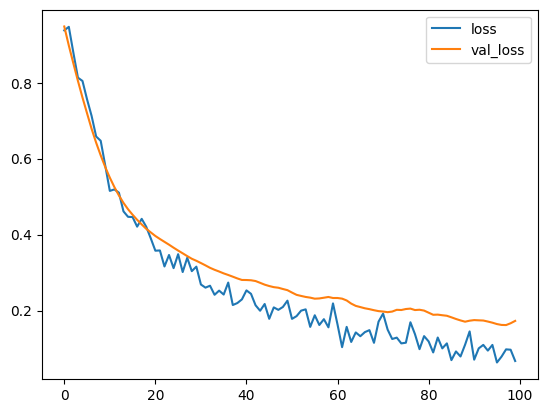

In [16]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))